In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
my_data=pd.read_csv('Aurism_Processing.csv')
my_data.head(5)
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         669 non-null    int64 
 1   A2_Score         669 non-null    int64 
 2   A3_Score         669 non-null    int64 
 3   A4_Score         669 non-null    int64 
 4   A5_Score         669 non-null    int64 
 5   A6_Score         669 non-null    int64 
 6   A7_Score         669 non-null    int64 
 7   A8_Score         669 non-null    int64 
 8   A9_Score         669 non-null    int64 
 9   A10_Score        669 non-null    int64 
 10  age              669 non-null    object
 11  gender           669 non-null    object
 12  ethnicity        669 non-null    object
 13  jundice          669 non-null    object
 14  austim           669 non-null    object
 15  contry_of_res    669 non-null    object
 16  used_app_before  669 non-null    object
 17  result           669 non-null    in

In [7]:
# 对分类变量进行编码
mapping_dict = {
    'ethnicity' : {
        "Asian" : 0,
        "Black" : 1,
        "Middle Eastern" : 2,
        "South Asian" : 3,
        "White-European" : 4,
        "Others" : 5
    },
    'jundice' : {
        "no" : 0,
        "yes" : 1
    },
    'austim' : {
        'no' : 0,
        'yes' : 1
    },
    'contry_of_res' : {
        "Africa" : 0,
        "Asia" : 1,
        "Europea" : 2,
        "North America" : 3,
        "Oceania" : 4,
        "South America" : 5
    },
    'gender' : {
        'm' : 0,
        'f' : 1
    },
    "used_app_before" : {
        "no" : 0,
        "yes" : 1
    },
    "age" : {
        "<27" : 0,
        ">27" : 1
    },
    "relation" :{ 
        "Self" : 0,
        "Other" : 1
    },
    "Class.ASD" : {
        "NO" : 0,
        "YES" : 1
    }
}
my_data = my_data.replace(mapping_dict) #变量映射
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         669 non-null    int64 
 1   A2_Score         669 non-null    int64 
 2   A3_Score         669 non-null    int64 
 3   A4_Score         669 non-null    int64 
 4   A5_Score         669 non-null    int64 
 5   A6_Score         669 non-null    int64 
 6   A7_Score         669 non-null    int64 
 7   A8_Score         669 non-null    int64 
 8   A9_Score         669 non-null    int64 
 9   A10_Score        669 non-null    int64 
 10  age              669 non-null    object
 11  gender           669 non-null    int64 
 12  ethnicity        669 non-null    object
 13  jundice          669 non-null    int64 
 14  austim           669 non-null    int64 
 15  contry_of_res    669 non-null    int64 
 16  used_app_before  669 non-null    int64 
 17  result           669 non-null    in

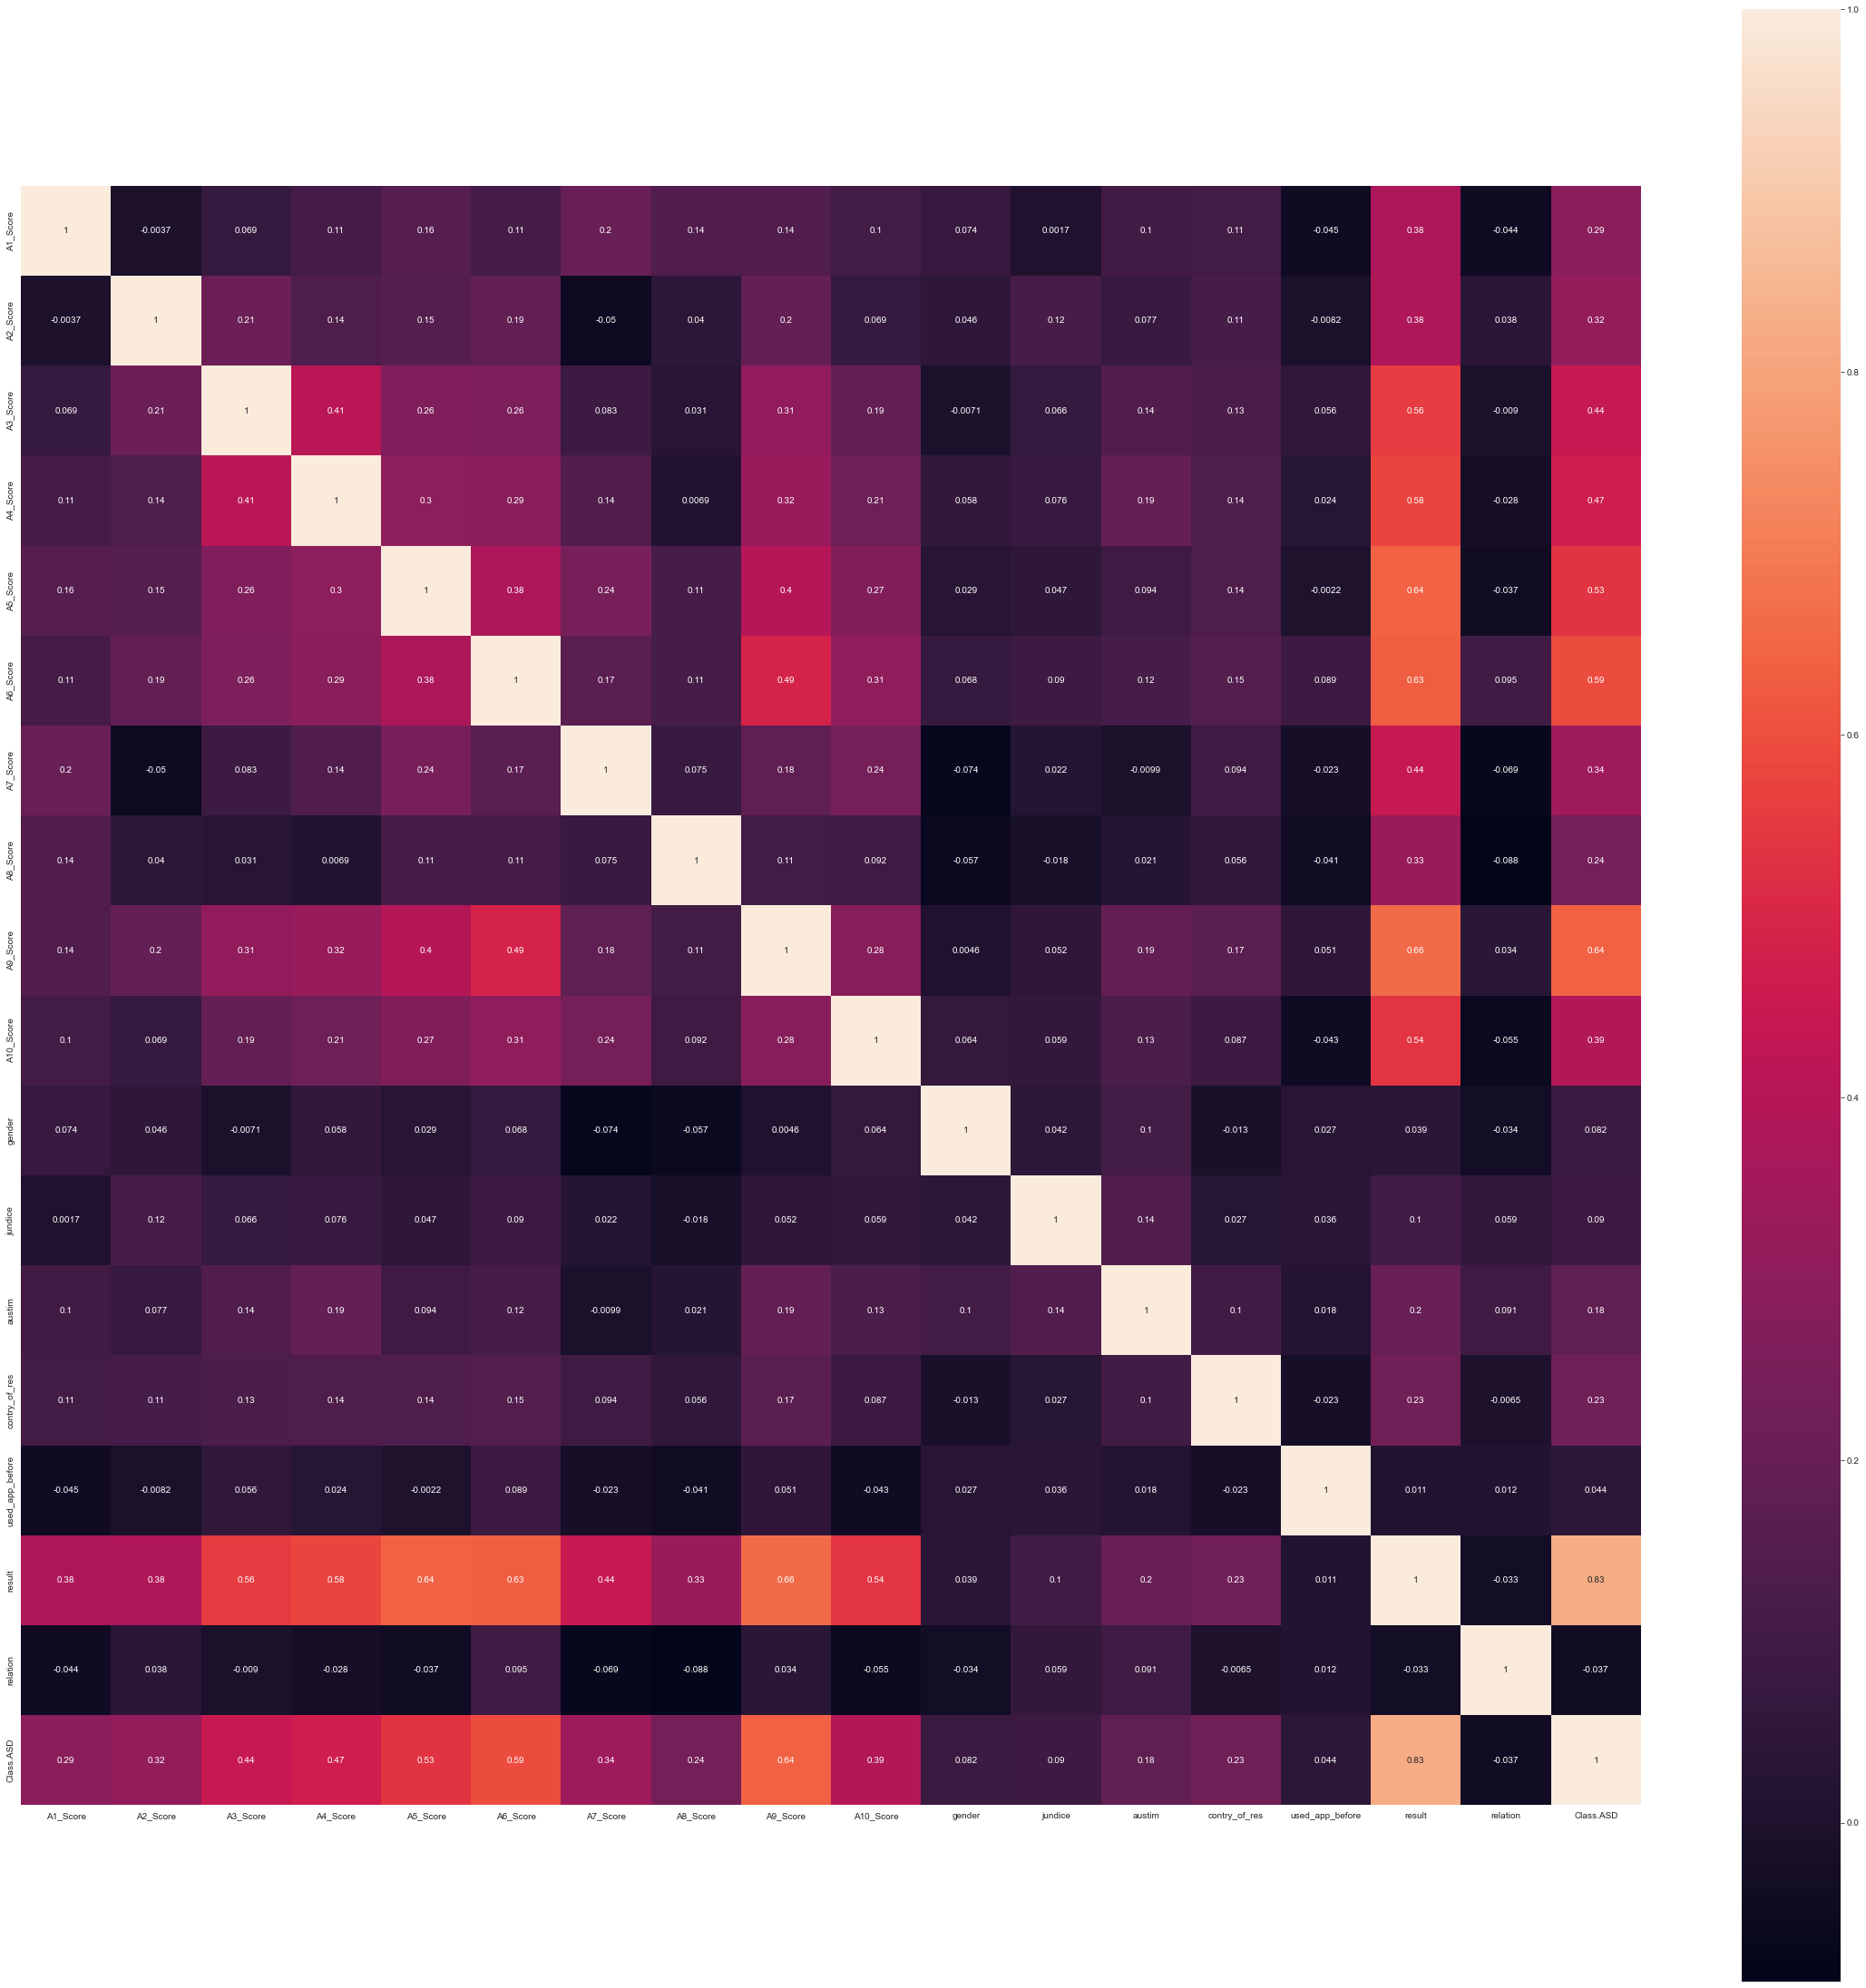

In [8]:
#绘制相关系数矩阵
plt.subplots(figsize=(40, 40))
sns.heatmap(my_data.corr(), annot=True, vmax=1, square=True)
plt.savefig('相关系数.png')
plt.show()

In [9]:
# 查看因变量的分布
x = my_data.drop('Class.ASD',axis=1, inplace=False)
y = my_data.loc[:,'Class.ASD']
my_data['Class.ASD'].value_counts()

0    487
1    182
Name: Class.ASD, dtype: int64

In [10]:
# 数据标准化处理
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(x)
X = pd.DataFrame(data=sc_X, columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
       'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim','contry_of_res', 'used_app_before', 'result','relation'])
X.head()


ValueError: could not convert string to float: '≤27'

In [ ]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1234)